In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df =pd.read_csv('elec.csv')

In [26]:
df.head(10)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
5,5879,Smartphones,Samsung,373.148325,37,1,8,1,1
6,5880,Smartphones,Samsung,2330.036775,26,1,5,5,1
7,5881,Smartphones,HP,780.101494,35,0,12,5,1
8,5882,Laptops,Other Brands,2264.561583,19,1,3,4,1
9,5883,Laptops,HP,1001.624006,66,1,8,4,1


In [27]:
df.shape

(9000, 9)

In [28]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [29]:
#checking for null values 
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [30]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features=[feature for feature in numeric_features if feature not in discrete_features]


In [31]:
numeric_features

['ProductID',
 'ProductPrice',
 'CustomerAge',
 'CustomerGender',
 'PurchaseFrequency',
 'CustomerSatisfaction',
 'PurchaseIntent']

In [32]:
categorical_features

['ProductCategory', 'ProductBrand']

In [33]:
discrete_features

['CustomerGender',
 'PurchaseFrequency',
 'CustomerSatisfaction',
 'PurchaseIntent']

In [34]:
continuous_features

['ProductID', 'ProductPrice', 'CustomerAge']

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

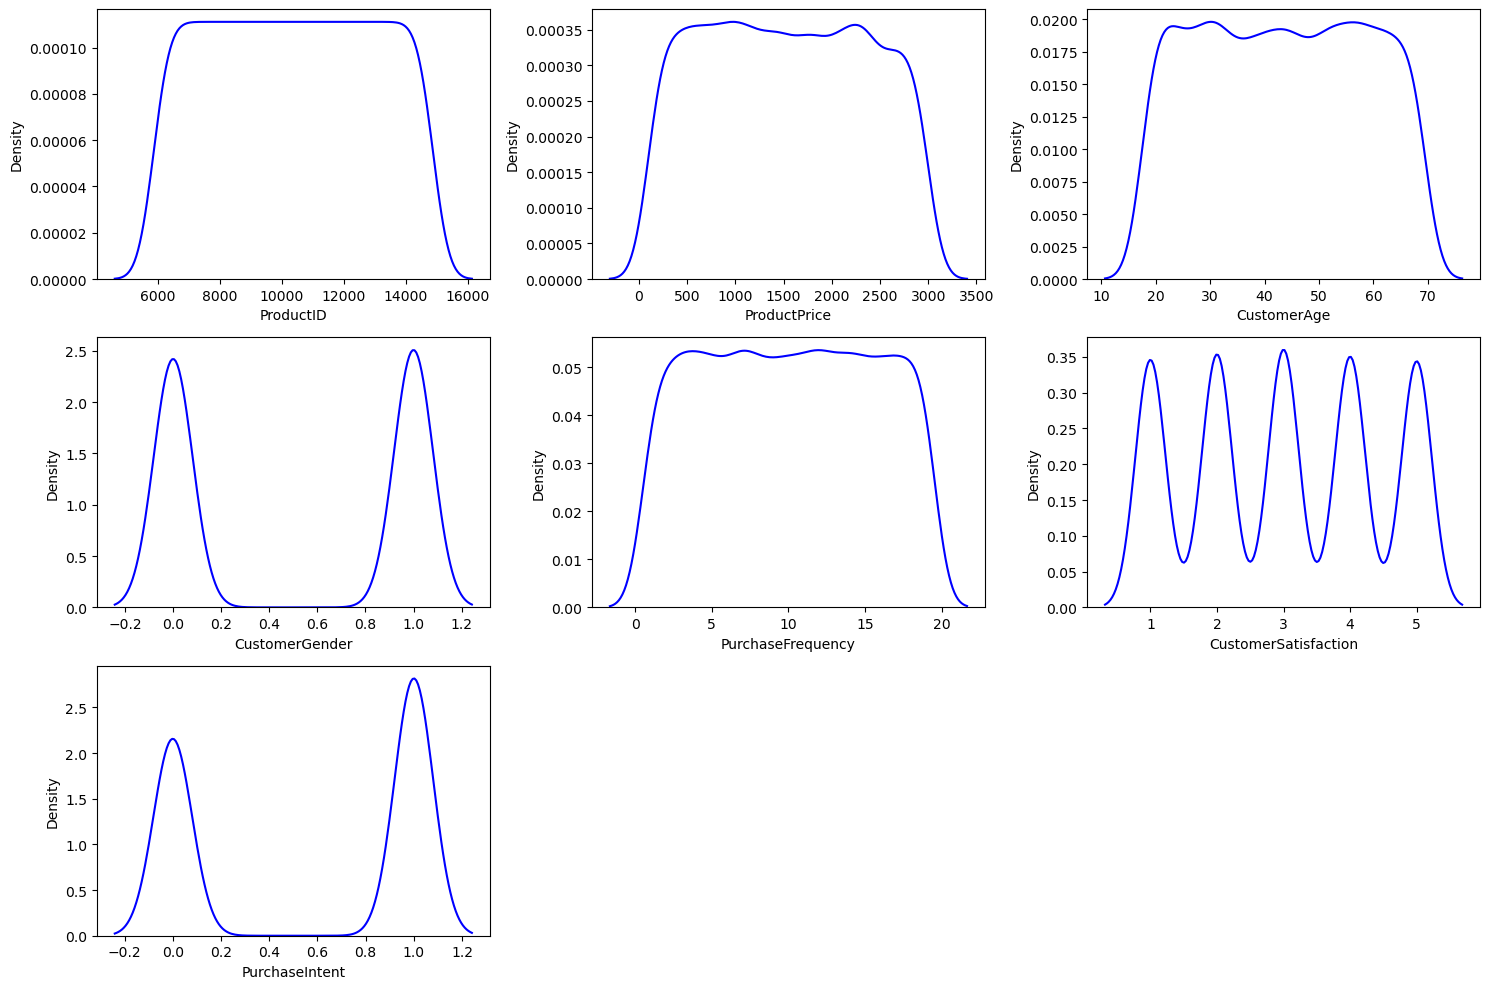

In [35]:
#Univariate Analysis for numerical_features
plt.figure(figsize=(15, 10))
for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

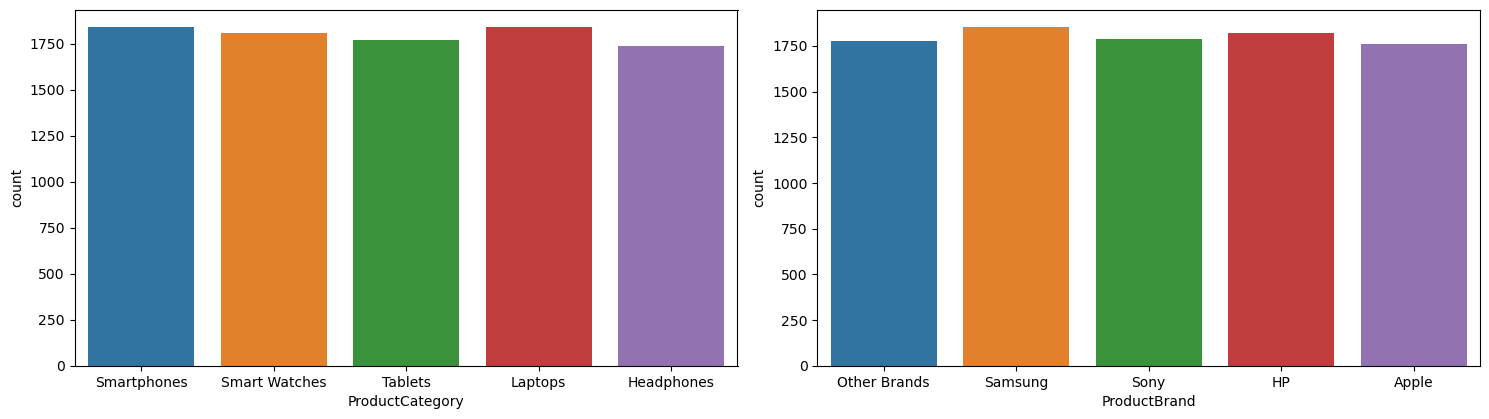

In [36]:
#Univariate Analysis for categorical_features
plt.figure(figsize=(15, 8))
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


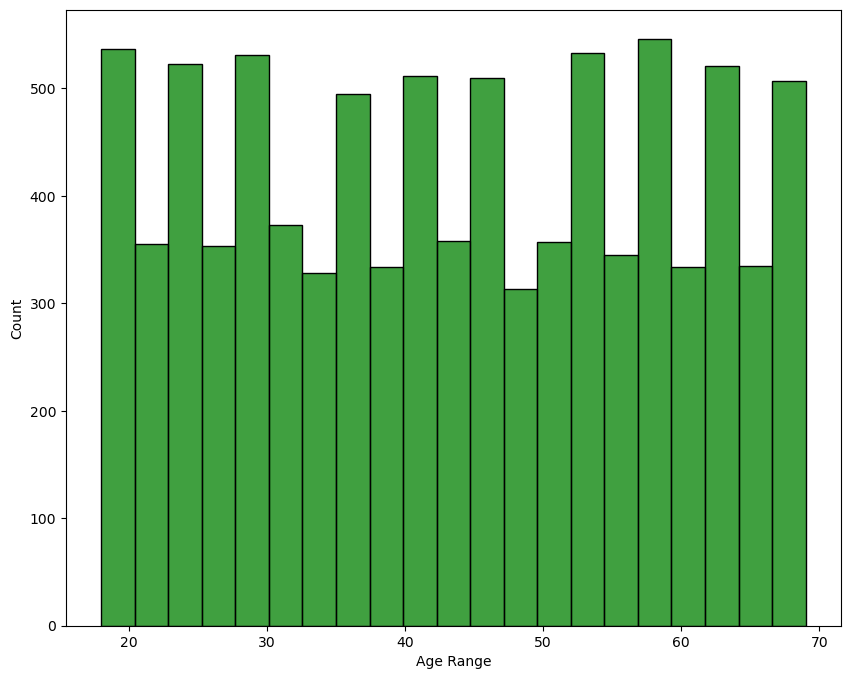

In [37]:
#customer age ranges
plt.figure(figsize=(10, 8))
sns.histplot(x='CustomerAge',data=df,color='green')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

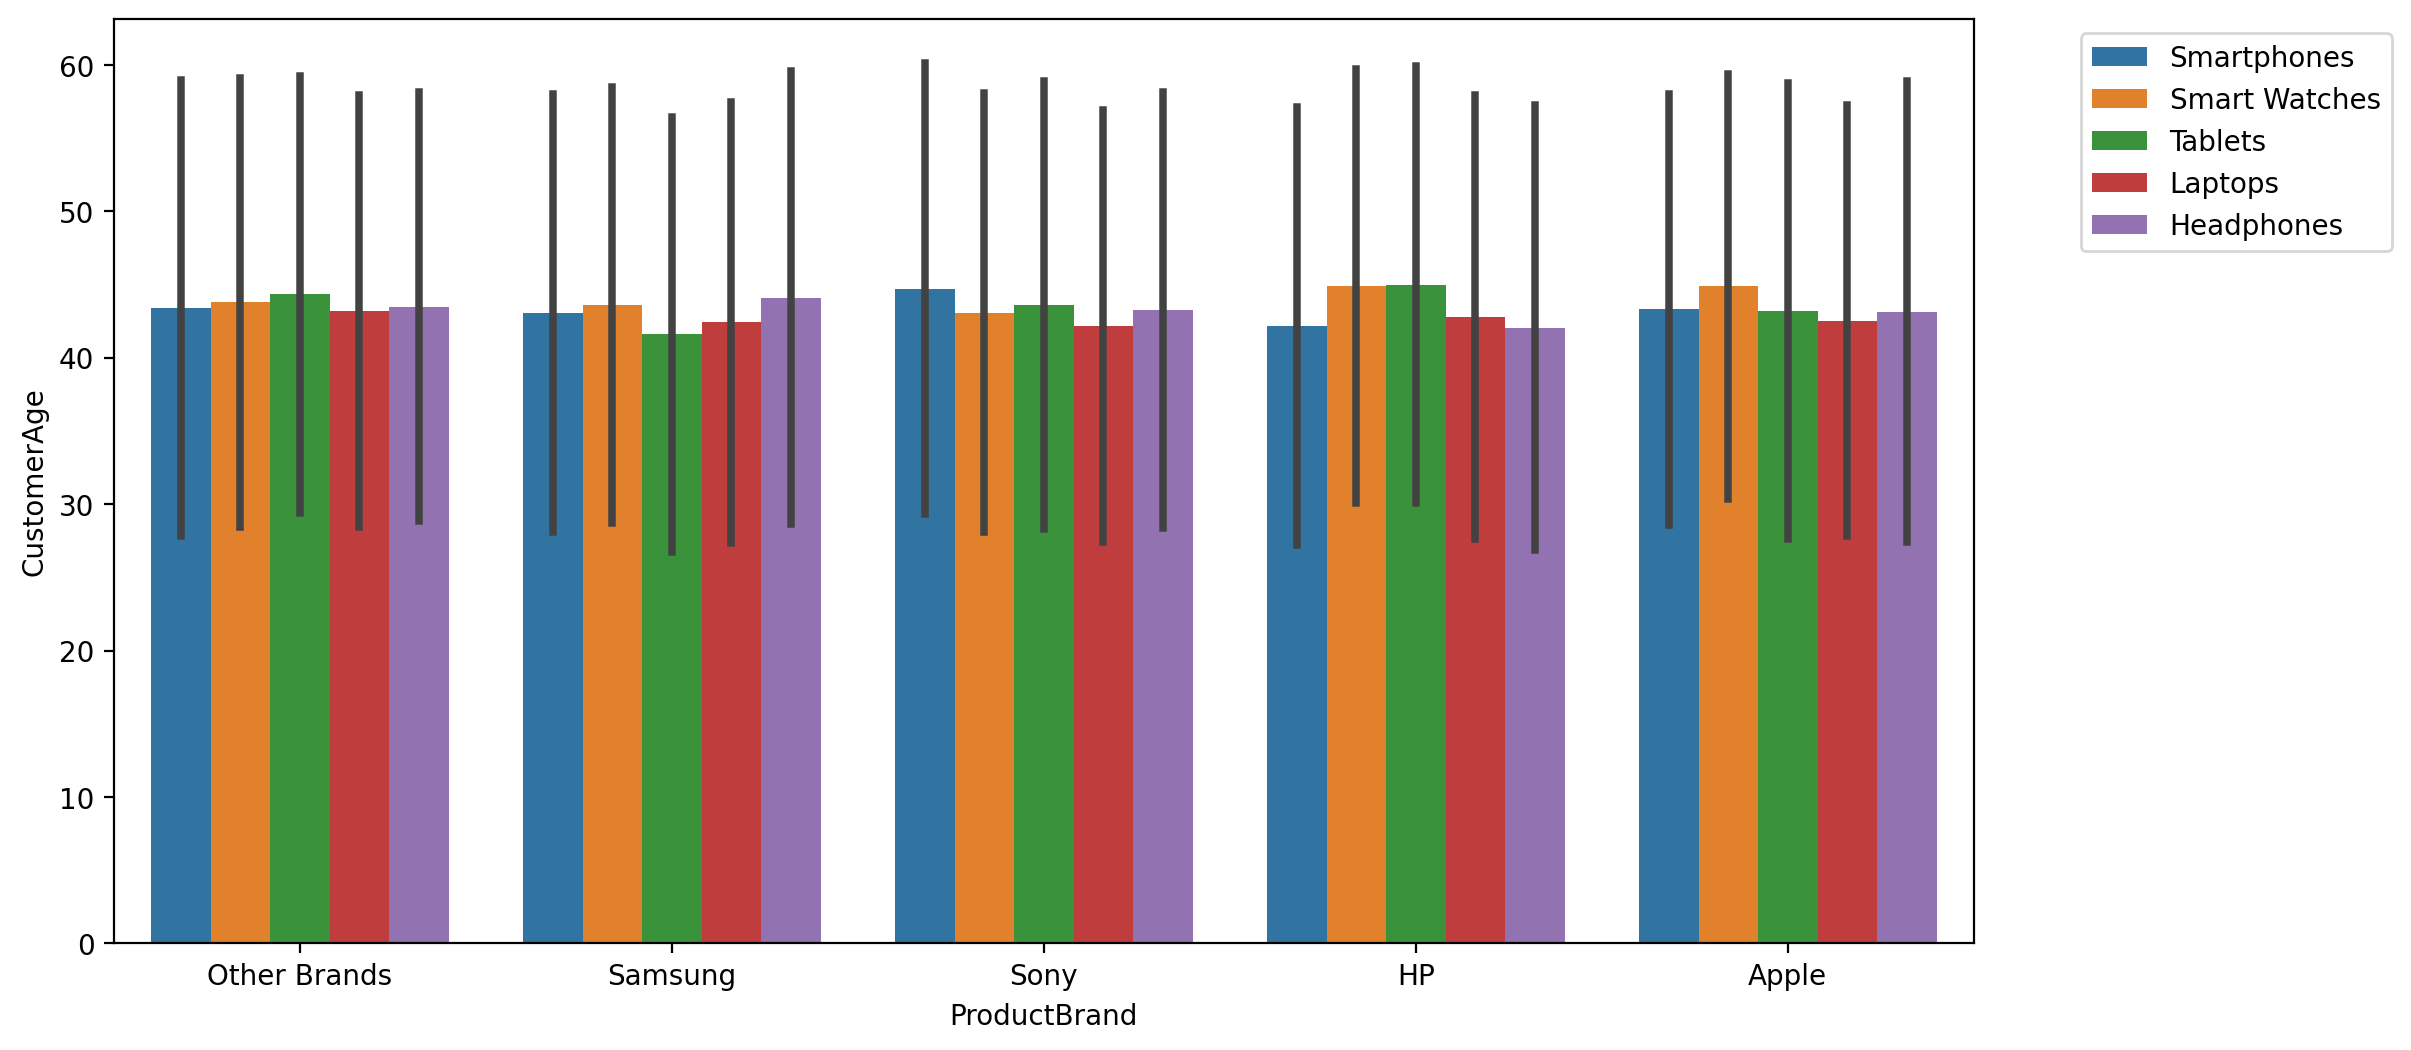

In [38]:
#customer age vs productbrand, productcategory
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x='ProductBrand',y='CustomerAge',data=df,estimator=np.mean,errorbar='sd',hue='ProductCategory')
plt.legend(bbox_to_anchor=(1.05, 1))

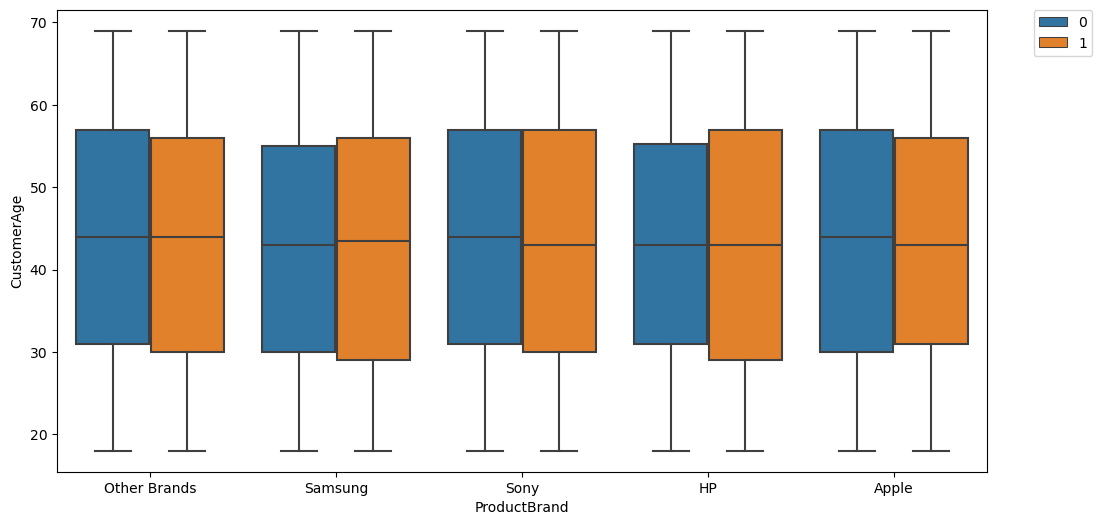

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ProductBrand',y='CustomerAge',data=df,hue='CustomerGender')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

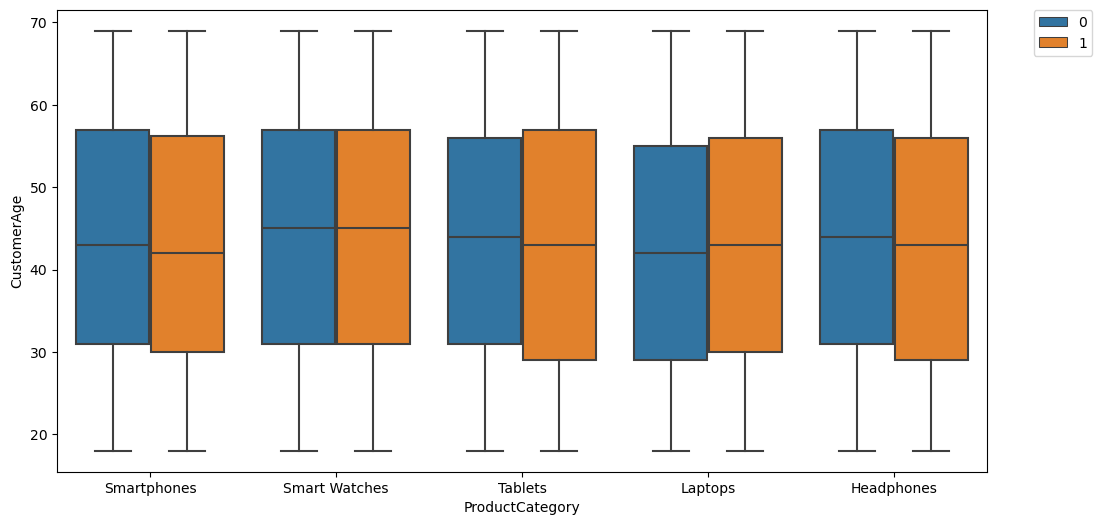

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ProductCategory',y='CustomerAge',data=df,hue='CustomerGender')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
#creating dummy variable for categorical columns
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')
df_objs = pd.get_dummies(df_objs,drop_first=True)
df = pd.concat([df_nums,df_objs],axis=1)

In [42]:
df.head()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
0,5874,312.949668,18,0,2,1,0,False,False,True,False,False,True,False,False
1,5875,980.389404,35,1,7,2,1,False,True,False,False,False,False,True,False
2,5876,2606.718293,63,0,1,5,1,False,False,False,True,False,False,True,False
3,5877,870.395450,63,1,10,3,1,False,False,True,False,False,False,True,False
4,5878,1798.955875,57,0,17,3,0,False,False,False,True,False,False,False,True


In [43]:
#droping the productid which is not neccessary for prediction
df.drop('ProductID',axis=1)

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
0,312.949668,18,0,2,1,0,False,False,True,False,False,True,False,False
1,980.389404,35,1,7,2,1,False,True,False,False,False,False,True,False
2,2606.718293,63,0,1,5,1,False,False,False,True,False,False,True,False
3,870.395450,63,1,10,3,1,False,False,True,False,False,False,True,False
4,1798.955875,57,0,17,3,0,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1041.149163,36,1,16,4,0,False,True,False,False,False,False,True,False
8996,1485.694311,57,0,5,1,1,False,False,True,False,False,False,True,False
8997,2887.369597,28,0,18,4,0,False,False,False,False,False,False,True,False
8998,1490.453964,38,0,4,2,1,False,False,False,True,True,False,False,False


In [44]:
#checking correlation of each column with target column
df.corr()['PurchaseIntent'].sort_values()

ProductBrand_Samsung            -0.022834
ProductCategory_Laptops         -0.019667
ProductPrice                    -0.017512
ProductID                       -0.006596
ProductCategory_Tablets         -0.005665
ProductBrand_Sony               -0.004457
PurchaseFrequency               -0.001465
ProductBrand_Other Brands       -0.000003
ProductBrand_HP                  0.007296
ProductCategory_Smart Watches    0.014955
ProductCategory_Smartphones      0.016773
CustomerAge                      0.289798
CustomerSatisfaction             0.391133
CustomerGender                   0.504412
PurchaseIntent                   1.000000
Name: PurchaseIntent, dtype: float64

In [45]:
#splitting the data into x and y
x = df.drop('PurchaseIntent', axis=1)
y = df['PurchaseIntent']

In [46]:
#checking for skewness 
# Check Skewness
x[continuous_features].skew(axis=0, skipna=True)

ProductID       0.000000
ProductPrice    0.029077
CustomerAge     0.003520
dtype: float64

In [47]:
#no such big positively skews found hence applying power transformer is not required